# Line images and ratios from 30 Dor MUSE data

In [1]:
from pathlib import Path
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import cmasher as cm
from mpdaf.obj import Image
from astropy.io import fits
from astropy.wcs import WCS
import pandas as pd

sns.set_context("talk")
sns.set_color_codes()

In [2]:
DATADIR = Path("../data")
def p(s):
    """Return path to image file"""
    return str(DATADIR / f"lmc-30dor-ABCD-{s}-bin01-sum.fits")

In [77]:
imcont = Image("../data/lmc-30dor-ABCD-46-55-avcont.fits")

## The misterious molecular lines

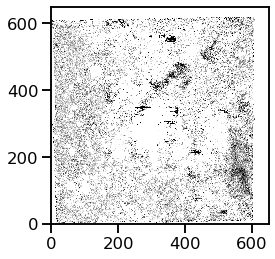

In [4]:
im9114 = Image(p("xxx-9114"))
im9112c = Image(p("CONT-9112"))

im9114.data -= im9112c.data
im9114.plot(vmin=-10, vmax=50, cmap="gray_r")

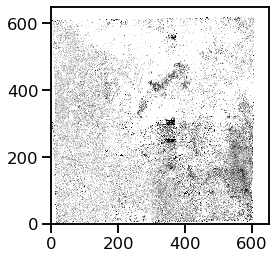

In [5]:
im8152 = Image(p("xxx-8152"))

im8152.plot(vmin=-10, vmax=50, cmap="gray_r")

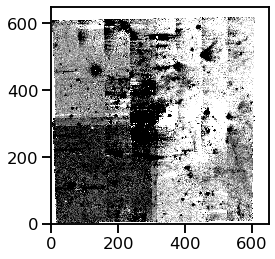

In [6]:
im8727 = Image(p("ci-8727"))
im8727.plot(vmin=-10, vmax=50, cmap="gray_r")

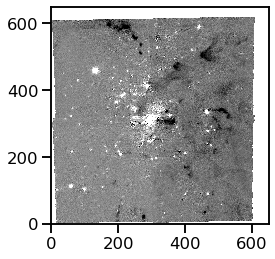

In [7]:
im8730c = Image(p("CONT-8730"))
im8727.data -= im8730c.data

im8727.plot(vmin=-150, vmax=150, cmap="gray_r")

## H I line ratios for reddening

In [8]:
hifiles = DATADIR.glob(f"lmc-30dor-ABCD-hi-*-bin01-sum.fits")
sorted(hifiles)

[PosixPath('../data/lmc-30dor-ABCD-hi-4861-bin01-sum.fits'),
 PosixPath('../data/lmc-30dor-ABCD-hi-8467-bin01-sum.fits'),
 PosixPath('../data/lmc-30dor-ABCD-hi-8545-bin01-sum.fits'),
 PosixPath('../data/lmc-30dor-ABCD-hi-8598-bin01-sum.fits'),
 PosixPath('../data/lmc-30dor-ABCD-hi-8665-bin01-sum.fits'),
 PosixPath('../data/lmc-30dor-ABCD-hi-8750-bin01-sum.fits'),
 PosixPath('../data/lmc-30dor-ABCD-hi-8863-bin01-sum.fits'),
 PosixPath('../data/lmc-30dor-ABCD-hi-9015-bin01-sum.fits'),
 PosixPath('../data/lmc-30dor-ABCD-hi-9229-bin01-sum.fits')]

In [9]:
im4861 = Image(p("hi-4861"))
im8467 = Image(p("hi-8467"))
im8545 = Image(p("hi-8545"))
im8598 = Image(p("hi-8598"))
im8665 = Image(p("hi-8665"))
im8750 = Image(p("hi-8750"))
im9229 = Image(p("hi-9229"))

In [38]:
im6563 = Image("../data/MUSE_R136toWill/GAUS_Ha6562.8_060_Will.fits")
saveunit = im6563.unit
sig6563 = Image("../data/MUSE_R136toWill/GAUS_Ha6562.8_060_Will.fits", ext=3)
im6563.data *= sig6563.data / 1.25
im6563.unit = saveunit

In [39]:
im6563.unit

Unit("1e-20 erg / (Angstrom cm2 s)")

In [51]:
im7751 = Image(p("ariii-7751"))
im7136 = Image(p("ariii-7136"))
(im7751 / im7136).data.mean()

0.2670340102039979

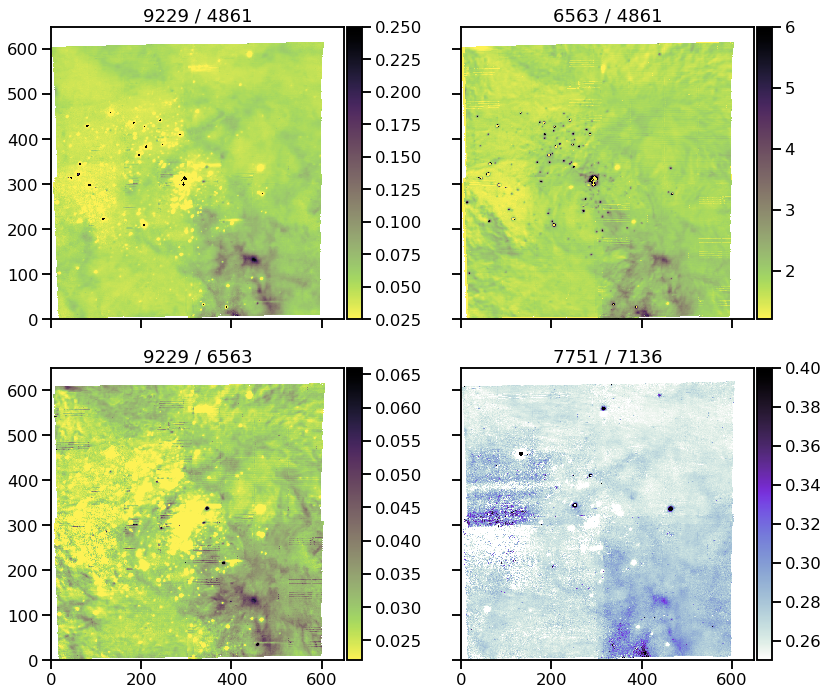

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
(im9229 / im4861).plot(
    vmin=0.025, vmax=0.25, 
    cmap=cm.ghostlight_r,
    ax=axes[0, 0],
    colorbar="v",
)
axes[0, 0].set_title("9229 / 4861")
(im6563 / im4861).plot(
    vmin=1.2, vmax=6.0, 
    cmap=cm.ghostlight_r,
    ax=axes[0, 1],
    colorbar="v",
)
axes[0, 1].set_title("6563 / 4861")
(im9229 / im6563).plot(
    vmin=0.022, vmax=0.066, 
    cmap=cm.ghostlight_r,
    ax=axes[1, 0],
    colorbar="v",
)
axes[1, 0].set_title("9229 / 6563")
(im7751 / im7136).plot(
    vmin=0.25, vmax=0.4, 
    cmap=cm.amethyst_r,
    ax=axes[1, 1],
    colorbar="v",
)
axes[1, 1].set_title("7751 / 7136")
fig.tight_layout();

In general, there is a good correlatrion between all the reddening indicators


There are some cases, however, where the blue–red reddening and the red–infared are different.  For instance, the cloud at (x, y) = (400, 10) has a high 6563/4861 and hifg 7751/7136, but is not particularly visible in 9229 / 6563

''

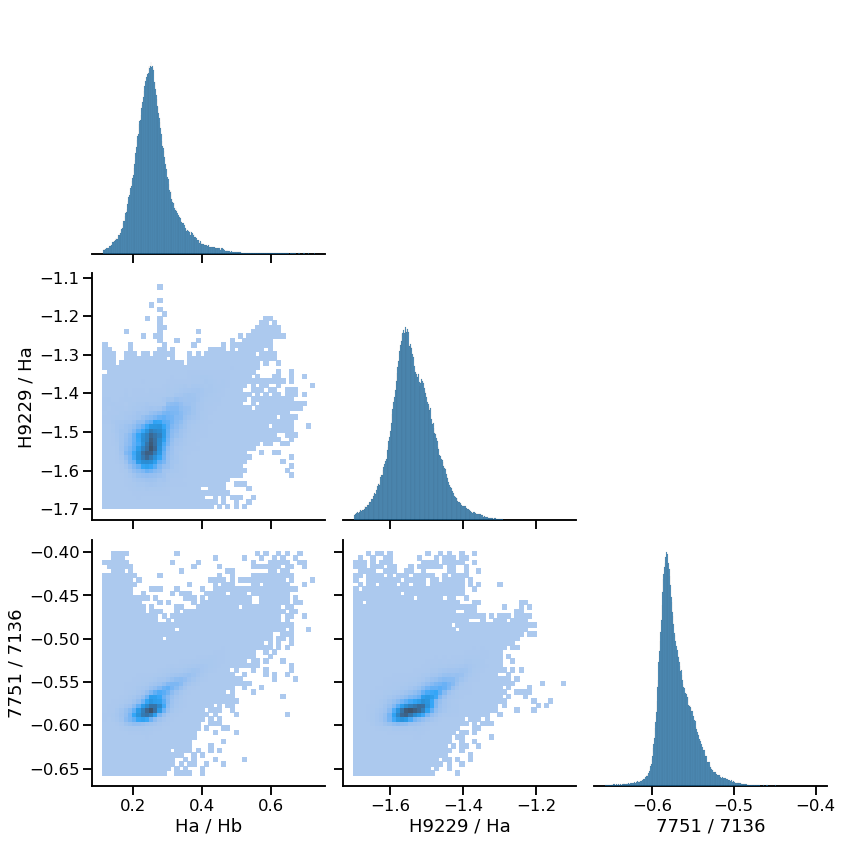

In [89]:
n = 1
r_hi_hb = im9229.rebin(n) / im4861.rebin(n)
r_ha_hb = im6563.rebin(n) / im4861.rebin(n)
r_hi_ha = im9229.rebin(n) / im6563.rebin(n)
r_ariii = im7751.rebin(n) / im7136.rebin(n)
m = ~r_hi_ha.data.mask & (imcont.rebin(n).data < 1e3)
m = m & (r_hi_ha.data > 0.02) & (r_hi_ha.data < 0.1)
m = m & (r_ha_hb.data > 1.3) & (r_ha_hb.data < 7.0)
m = m & (r_ariii.data > 0.22) & (r_ariii.data < 0.4)

df = pd.DataFrame(
    {
        "Ha / Hb": np.log10(r_ha_hb.data[m]),
        "H9229 / Ha": np.log10(r_hi_ha.data[m]),
        "7751 / 7136": np.log10(r_ariii.data[m]),
    }
)

g = sns.pairplot(
    df,
    kind="hist",
    height=4,
    corner=True,
    plot_kws=dict(
        weights=im9229.rebin(n).data[m],
#        weights=r_hi_hb.data[m] - 0.025,
        bins=50,
    ),
)
;

In [72]:
g.axes[idiags]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:xlabel='7751 / 7136'>],
      dtype=object)

## The O++ lines

In [14]:
im4959 = Image(p("oiii-4959"))
im4931 = Image(p("oiii-4931"))
im4642 = Image(p("oii-4642"))
im4650 = Image(p("oii-4650"))

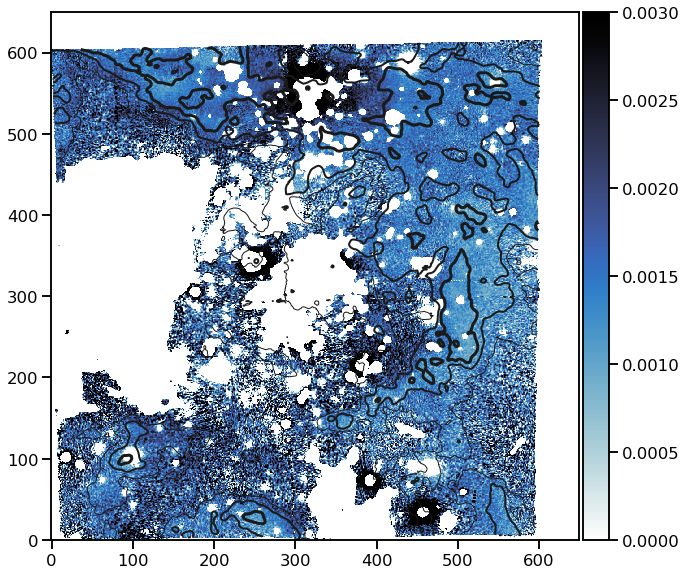

In [15]:
r_orl_cel = ((im4650 + im4642)/ im4959)
r_orl_cel.mask = r_orl_cel.mask | (im4959.data < 3e4) | (imcont.data > 1e3)
fig, ax = plt.subplots(figsize=(10, 10))
r_orl_cel.plot(vmin=0, vmax=0.003, cmap=cm.arctic_r, colorbar="v")
ax.contour(im4959.data, levels=[1e5, 2e5, 4e5], linewidths=[1.0, 2.0, 3.0], colors="k")

This shows that the collisional lines are relatively stronger where the intensity is highest.  And that teh permitted lines are relatively higher in the inner parts. 

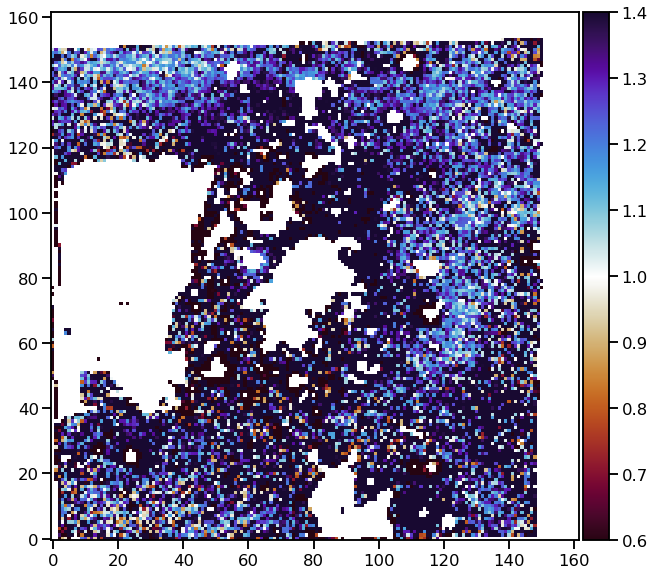

In [16]:
n = 4
im1, im2 = im4642.copy(), im4650.copy()
im1.mask = im1.mask | (im4959.data < 3e4) | (imcont.data > 1e3)
im2.mask = im1.mask
r = (im1.rebin(n) / im2.rebin(n))
fig, ax = plt.subplots(figsize=(10, 10))
r.plot(vmin=0.6, vmax=1.4, cmap=cm.fusion, colorbar="v")

In [17]:
im4740 = Image(p("ariv-4740"))
im7330 = Image(p("oii-7330"))

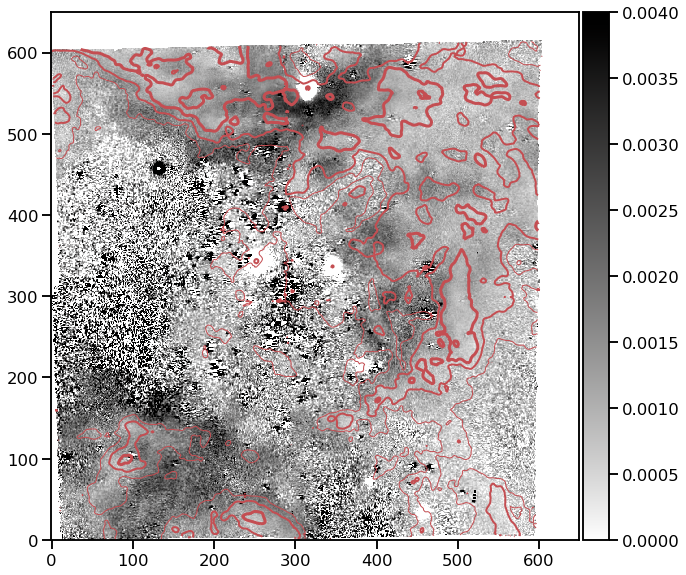

In [18]:
r_ariv_oiii = (im4740 / im4959)
fig, ax = plt.subplots(figsize=(10, 10))
r_ariv_oiii.plot(vmin=0.0, vmax=0.004, cmap=cm.neutral_r, colorbar="v")
ax.contour(im4959.data, levels=[1e5, 2e5, 4e5], linewidths=[1.0, 2.0, 3.0], colors="r")

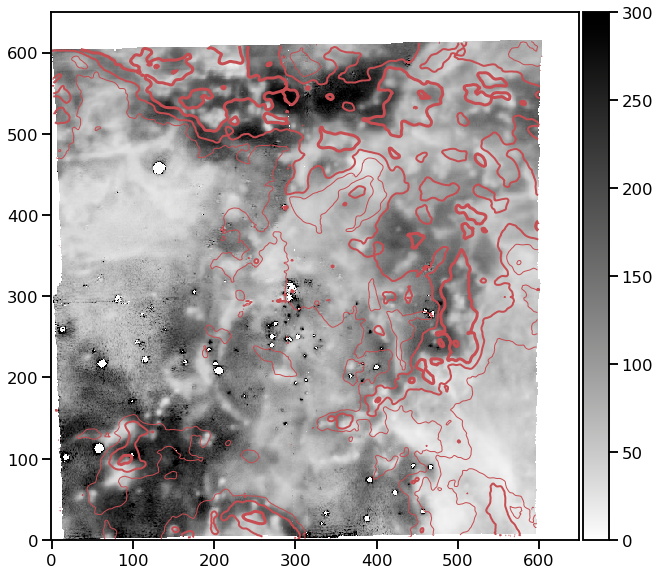

In [19]:
r_oiii_oii = (im4959 / im7330)
fig, ax = plt.subplots(figsize=(10, 10))
r_oiii_oii.plot(vmin=0.0, vmax=300.0, cmap=cm.neutral_r, colorbar="v")
ax.contour(im4959.data, levels=[1e5, 2e5, 4e5], linewidths=[1.0, 2.0, 3.0], colors="r")

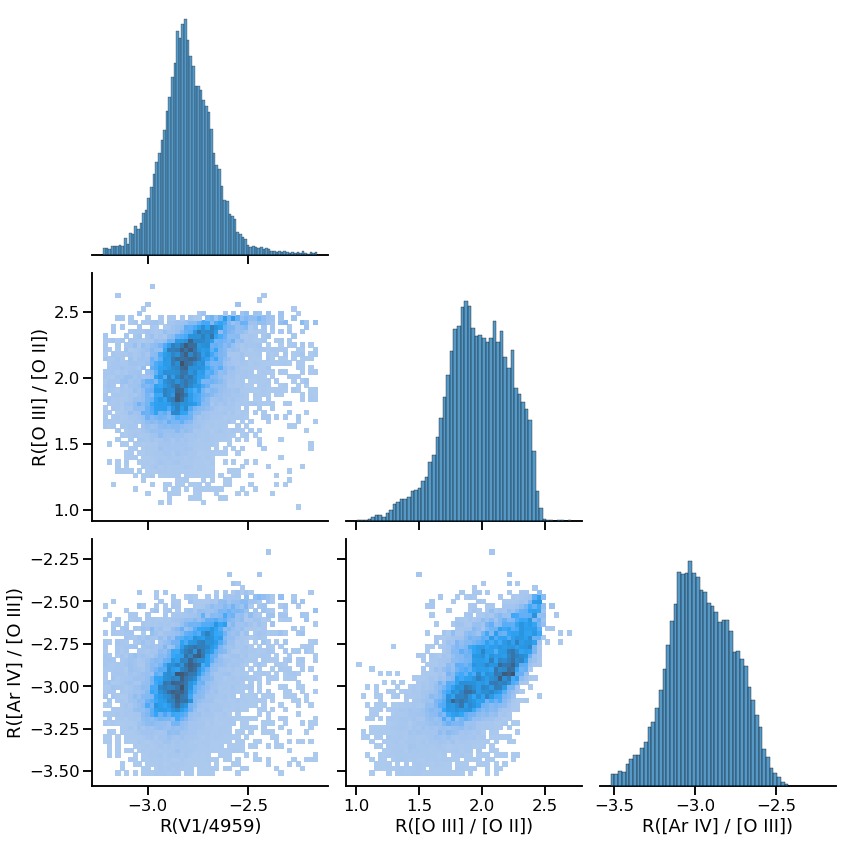

In [20]:
n = 4
m = ~r_orl_cel.rebin(n).data.mask
m = m & (r_oiii_oii.rebin(n).data > 3.0) & (r_oiii_oii.rebin(n).data < 600.0)
m = m & (r_ariv_oiii.rebin(n).data > 3e-4) & (r_ariv_oiii.rebin(n).data < 0.007)
m = m & (r_orl_cel.rebin(n).data > 6e-4) & (r_orl_cel.rebin(n).data < 0.007)
df = pd.DataFrame(
    {
        "R(V1/4959)": np.log10(r_orl_cel.rebin(n).data[m]),
        "R([O III] / [O II])": np.log10(r_oiii_oii.rebin(n).data[m]),
        "R([Ar IV] / [O III])": np.log10(r_ariv_oiii.rebin(n).data[m]),
    }
)

g = sns.pairplot(
    df,
    kind="hist",
    height=4,
    corner=True,
    plot_kws=dict(
        weights=im4740.rebin(n).data[m],
        bins=50,
    ),
);


## Look at the Raman wings